# Credit Scoring System Project

## Project Overview

## Develop a credit scoring system to assess the creditworthiness of loan applicants using logistic regression and the Weight of Evidence (WoE) concept.

## A model that provides a credit score, improves approval rates, and reduces false positives.

## Project involves several key steps:

## Importing Libraries and Loading Data: Import libraries for data manipulation, machine learning, and visualization. Load the dataset and assign appropriate column names.
## Data Preprocessing: Convert target variable to binary format, handle missing values, and convert categorical variables to numerical values using one-hot encoding.
## Exploratory Data Analysis (EDA): Perform descriptive statistics and correlation analysis, and visualize the correlation matrix using a heatmap.
## Splitting Data: Separate the features and target variable, and split the data into training and testing sets.
## Training and Evaluating the Model: Train a logistic regression model, predict the target variable for the test set, evaluate the model's performance, and calculate the ROC-AUC score.

# Import necessary libraries and load the dataset into a Pandas DataFrame

### Import Libraries: Import libraries for data manipulation, machine learning, and visualization.
### Load Data: Load the German Credit Data from the UCI repository and assign appropriate column names.
### Preview Data: Display the first few rows to understand the structure of the dataset.

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = ["Status_of_existing_checking_account", "Duration_in_month", "Credit_history", "Purpose",
           "Credit_amount", "Savings_account_bonds", "Present_employment_since", "Installment_rate_in_percentage_of_disposable_income",
           "Personal_status_and_sex", "Other_debtors_guarantors", "Present_residence_since", "Property",
           "Age_in_years", "Other_installment_plans", "Housing", "Number_of_existing_credits_at_this_bank",
           "Job", "Number_of_people_being_liable_to_provide_maintenance_for", "Telephone", "Foreign_worker", "Credit_risk"]
data = pd.read_csv(url, sep=' ', header=None, names=columns)

# Display the first few rows of the dataset
data.head()


,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_guarantors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,Credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## Clean the data and convert categorical variables to numerical values.

### Convert Target Variable: Convert Credit_risk to binary format (0 for good credit risk, 1 for bad credit risk).
### Handle Missing Values: Drop rows with missing values.
### One-Hot Encoding: Convert categorical variables to numerical values using one-hot encoding.
### Preview Data: Display the transformed dataset.

In [10]:
# Convert the target variable to binary format (0 and 1)
data['Credit_risk'] = data['Credit_risk'] - 1

# Handle missing values (if any)
data = data.dropna()

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Display the first few rows of the transformed dataset
data.head()


,Duration_in_month,Credit_amount,Installment_rate_in_percentage_of_disposable_income,Present_residence_since,Age_in_years,Number_of_existing_credits_at_this_bank,Number_of_people_being_liable_to_provide_maintenance_for,Credit_risk,Status_of_existing_checking_account_A12,Status_of_existing_checking_account_A13,...,Property_A124,Other_installment_plans_A142,Other_installment_plans_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,Foreign_worker_A202
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,0,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,1,0,0,...,1,0,1,0,1,0,1,0,0,0


# Perform descriptive statistics and correlation analysis.

### Descriptive Statistics: Generate summary statistics of numerical features.
### Correlation Analysis: Calculate the correlation matrix to understand relationships between features.
### Visualization: Plot a heatmap of the correlation matrix using Seaborn.

       Duration_in_month  Credit_amount  \
count        1000.000000    1000.000000   
mean           20.903000    3271.258000   
std            12.058814    2822.736876   
min             4.000000     250.000000   
25%            12.000000    1365.500000   
50%            18.000000    2319.500000   
75%            24.000000    3972.250000   
max            72.000000   18424.000000   

       Installment_rate_in_percentage_of_disposable_income  \
count                                        1000.000000     
mean                                            2.973000     
std                                             1.118715     
min                                             1.000000     
25%                                             2.000000     
50%                                             3.000000     
75%                                             4.000000     
max                                             4.000000     

       Present_residence_since  Age_in_years  \
count

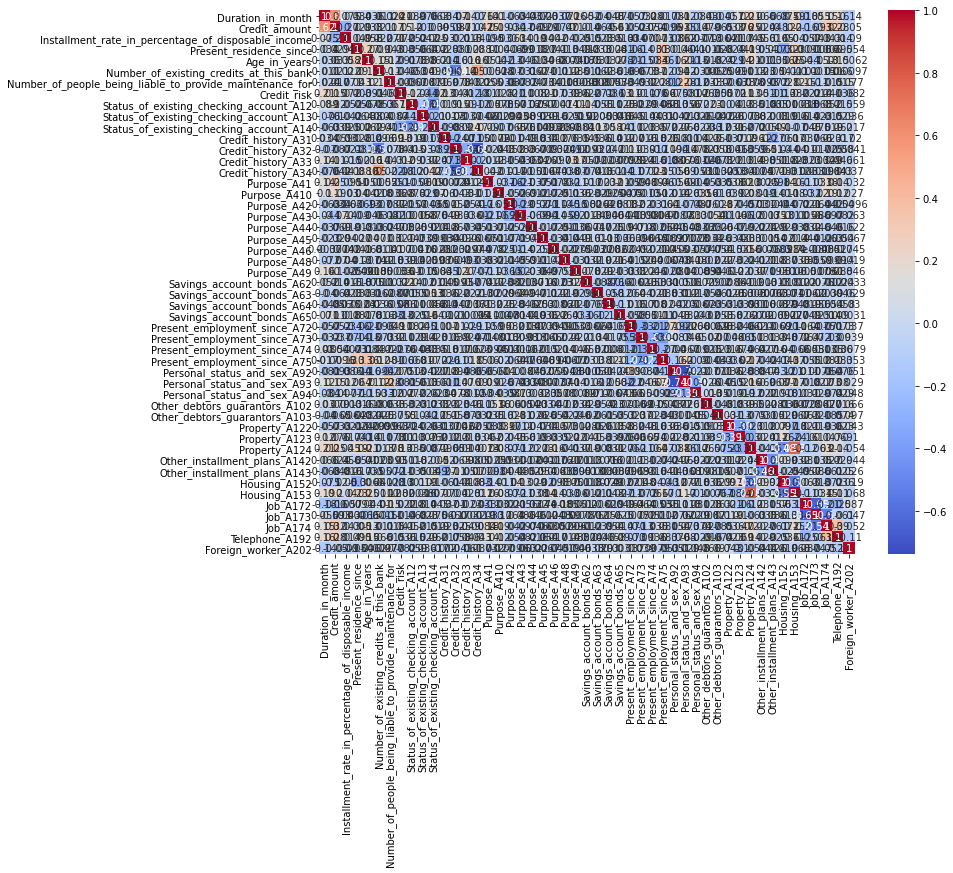

In [11]:
# Descriptive statistics
print(data.describe())

# Correlation analysis
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


# Split the dataset into training and testing sets.

### Features and Target: Separate the features (X) from the target variable (y).
### Train-Test Split: Divide the data into training (70%) and testing (30%) sets using train_test_split.
### Random State: Set random_state for reproducibility.
### Display Shapes: Verify the split by displaying the shapes of the training and testing sets.

In [13]:
# Split the data into training and testing sets
X = data.drop('Credit_risk', axis=1)
y = data['Credit_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(700, 48) (300, 48) (700,) (300,)


# Train and Evaluate Logistic Regression Model

### Train Model: Train a logistic regression model using the training data.
### Mathematics: Logistic regression predicts the probability of the target variable 𝑦 using the logistic function.
### The model is trained using maximum likelihood estimation to find the best-fitting parameters 𝛽.

### Predict: Predict the target variable for the test set using the trained model.

### Evaluate: Evaluate the model's performance using classification metrics such as precision, recall, F1-score, and support.

### ROC-AUC: Calculate the ROC-AUC score and plot the ROC curve.
### Mathematics: The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
### The AUC (Area Under the Curve) represents the model's ability to distinguish between classes.



              precision    recall  f1-score   support

           0       0.79      0.92      0.85       209
           1       0.70      0.44      0.54        91

    accuracy                           0.77       300
   macro avg       0.75      0.68      0.70       300
weighted avg       0.76      0.77      0.76       300



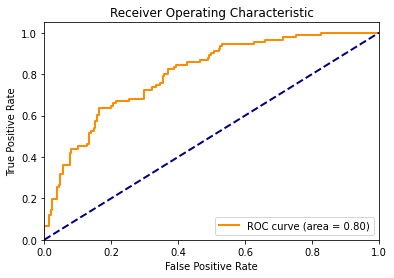

In [14]:
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Print classification report
print(classification_report(y_test, y_pred))

# Calculate and plot ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
